In [61]:
import numpy as np
import keras
import glob
import PIL.Image as Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.mobilenetv2 import preprocess_input, decode_predictions

%matplotlib inline

In [9]:
def norm(a):
    return a/np.linalg.norm(a)

In [2]:
a = np.array([1,2,3,4])
np.linalg.norm(a)

5.477225575051661

In [8]:
np.sqrt(np.sum(a**2))

5.477225575051661

In [3]:
a/np.linalg.norm(a)

array([0.18257419, 0.36514837, 0.54772256, 0.73029674])

In [4]:
(a/np.linalg.norm(a)).sum()

1.8257418583505536

In [5]:
np.linalg.norm?

In [16]:
a = np.array([1,2,3,4])
a = norm(a)

In [15]:
b = np.array([1,2,2.5,4])
b = norm(b)
c = np.array([2,5,3,6])
c = norm(c)

f = [b,c]

In [19]:
b-a

array([ 0.00899107,  0.01798214, -0.06880941,  0.03596428])

In [18]:
f-a

array([[ 0.00899107,  0.01798214, -0.06880941,  0.03596428],
       [ 0.04992109,  0.21608982, -0.19897964, -0.03281091]])

In [21]:
d = np.linalg.norm(f-a, axis=1)
np.argsort(d)[:30]

In [22]:
d

array([0.08020201, 0.29976054])

array([0, 1], dtype=int64)

In [113]:
conv_base = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [28]:
# 全部
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

In [37]:
# no top
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

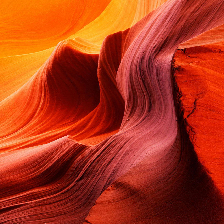

In [40]:
img1 = image.load_img('e:/pics/test/a1.jpg', target_size=(224,224))
img1

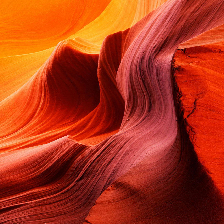

In [41]:
img2 = image.load_img('e:/pics/test/a1_c.jpg', target_size=(224,224))
img2

In [55]:
def encode(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    preds = preds.reshape(1,-1)
    print(preds.shape)
#     preds = keras.layers.MaxPool2D(7)(preds)
#     print(preds.shape)
    return preds

In [56]:
r1 =encode(img1)
r2 = encode(img2)

(1, 62720)
(1, 62720)


In [54]:
r = r.reshape(1,-1)
r.shape

(1, 62720)

In [88]:
def compare(target, features):
    d = np.linalg.norm(features-target, axis=1)
    print(d)
    return np.argsort(d)[:30], d

In [83]:
files = []
for f in glob.glob('e:/pics/test/*.jpg'):
    files.append(f)
files = np.array(files)

In [84]:
features = []
for f in glob.glob('e:/pics/test/*.jpg'):
    img = image.load_img(f, target_size=(224,224))
    feature = encode(img)
    features.append(feature)
features = np.array(features)
features = features.squeeze()

(1, 62720)
(1, 62720)
(1, 62720)
(1, 62720)
(1, 62720)
(1, 62720)
(1, 62720)


In [86]:
features.shape

(7, 62720)

In [72]:
r = features - r1
r.shape

(5, 62720)

In [73]:
np.linalg.norm(features-r1, axis=1)

array([  0.     ,   0.     , 361.4807 , 364.5413 , 385.17136],
      dtype=float32)

In [74]:
compare(r1, features)

[  0.        0.      361.4807  364.5413  385.17136]


array([0, 1, 2, 3, 4], dtype=int64)

In [107]:
img = image.load_img('e:/pics/test/a1_c3.jpg', target_size=(224,224))
r =encode(img)
rank, d = compare(r, features)

(1, 62720)
[134.25134 134.25134 103.84176   0.      377.94797 376.66473 398.63806]


In [108]:
# 修改大小后，距离相差很多，那么如果加max pool了？
d

array([134.25134, 134.25134, 103.84176,   0.     , 377.94797, 376.66473,
       398.63806], dtype=float32)

In [109]:
rank

array([3, 2, 0, 1, 5, 4, 6], dtype=int64)

In [93]:
rank

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [92]:
files[rank]

array(['e:/pics/test\\a1.jpg', 'e:/pics/test\\a1_c.jpg',
       'e:/pics/test\\a1_c2.jpg', 'e:/pics/test\\a1_c3.jpg',
       'e:/pics/test\\a2.jpg', 'e:/pics/test\\a3.jpg',
       'e:/pics/test\\a4.jpg'], dtype='<U22')

In [110]:
from keras import models
from keras import layers

In [114]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPool2D((7,7)))

In [116]:
layers.MaxPool2D?

In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 1280)        0         
Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
_________________________________________________________________


In [117]:
conv_base.trainable = False

In [122]:
def encode2(img_file):
    img = image.load_img(img_file, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    preds = preds.squeeze()
    return preds

In [121]:
preds.shape

(1280,)

In [123]:
features = []
for f in glob.glob('e:/pics/test/*.jpg'):
    feature = encode2(f)
    features.append(feature)
features = np.array(features)
features = features.squeeze()
print(features.shape)

(7, 1280)


In [139]:
r = encode2('e:/pics/test/a1.jpg')
r = r.reshape(1,-1)
print(r.shape)

(1, 1280)


In [140]:
# 做了max pool，距离变小了，之前是130，现在是30，效果不错
r = encode2('e:/pics/test/a1.jpg')
r = r.reshape(1,-1)
print(r.shape)

r, d= compare(r, features)
d = d.reshape(-1,1)
d*=1.0/d.max()
d=1-d
print(d)

(1, 1280)
[  0.         0.        31.63381   35.14268  106.84833  110.80709
 113.937775]
[[1.        ]
 [1.        ]
 [0.7223589 ]
 [0.69156253]
 [0.06222206]
 [0.02747715]
 [0.        ]]


In [126]:
from sklearn import preprocessing

In [133]:
norm = preprocessing.MinMaxScaler()
d = d.reshape(-1,1)
norm.fit_transform(d)

array([[0.        ],
       [0.        ],
       [0.27764112],
       [0.3084375 ],
       [0.93777794],
       [0.97252285],
       [1.        ]], dtype=float32)

In [136]:
d

array([[0.        ],
       [0.        ],
       [0.27764112],
       [0.3084375 ],
       [0.93777794],
       [0.97252285],
       [1.        ]], dtype=float32)